# [**Comparaison entre les plus proches voisins avec et sans l'Analyse des Composantes du Voisinage**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/1_6_neighbors/plot_nca_classification.ipynb)<br/>([_Comparing Nearest Neighbors with and without Neighborhood Components Analysis_](https://scikit-learn.org/stable/auto_examples/neighbors/plot_nca_classification.html))

Un exemple comparant la classification par plus proches voisins avec et sans l'Analyse des Composantes du Voisinage.

Il affiche les frontières de décision des classes fournies par un classifieur de plus proches voisins lors de l'utilisation de la distance euclidienne sur les caractéristiques originales, par opposition à l'utilisation de la distance euclidienne après la transformation apprise par l'Analyse des Composantes du Voisinage. Cette dernière vise à trouver une transformation linéaire qui maximise la précision de la classification (stochastique) par plus proches voisins sur l'ensemble d'entraînement.

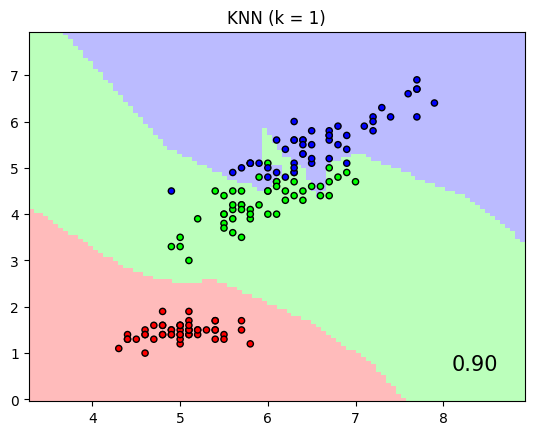

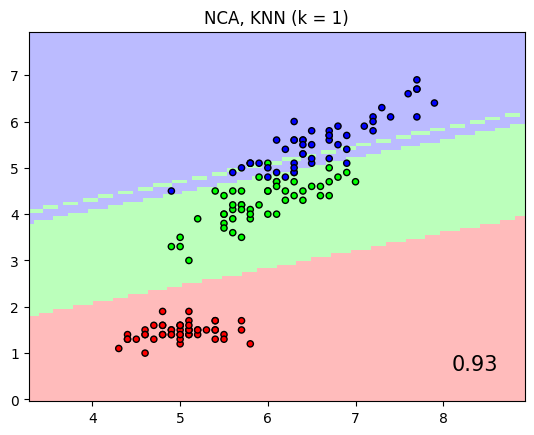

In [2]:
# License: BSD 3 clause

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

n_neighbors = 1

dataset = datasets.load_iris()
X, y = dataset.data, dataset.target

# we only take two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = X[:, [0, 2]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.7, random_state=42
)

h = 0.05  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

names = ["KNN", "NCA, KNN"]

classifiers = [
    Pipeline(
        [
            ("scaler", StandardScaler()),
            ("knn", KNeighborsClassifier(n_neighbors=n_neighbors)),
        ]
    ),
    Pipeline(
        [
            ("scaler", StandardScaler()),
            ("nca", NeighborhoodComponentsAnalysis()),
            ("knn", KNeighborsClassifier(n_neighbors=n_neighbors)),
        ]
    ),
]

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        alpha=0.8,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        shading="auto",
    )

    # Plot also the training and testing points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=20)
    plt.title(f"{name} (k = {n_neighbors})")
    plt.text(
        0.9,
        0.1,
        f"{score:.2f}",
        size=15,
        ha="center",
        va="center",
        transform=plt.gca().transAxes,
    )

plt.show()